In [2]:
import os
import numpy as np

import yaml
import json
import matplotlib.pyplot as plt
import mdtraj
import urllib.request
import seaborn as sns

from OrderParameter import *

# Download link
def download_link(doi, file):
    if "zenodo" in doi.lower():
        zenodo_entry_number = doi.split(".")[2]
        return 'https://zenodo.org/record/' + zenodo_entry_number + '/files/' + file
    else:
        print ("DOI provided: {0}".format(doi))
        print ("Repository not validated. Please upload the data for example to zenodo.org")
        return ""
    
# read mapping file
def read_mapping_file(mapping_file, atom1):
    with open(mapping_file, 'rt') as mapping_file:
            for line in mapping_file:
                if atom1 in line:
                    m_atom1 = line.split()[1]
    return m_atom1

def read_mapping_filePAIR(mapping_file, atom1, atom2):
    with open(mapping_file, 'rt') as mapping_file:
            print(mapping_file)
            for line in mapping_file:
                if atom1 in line:
                    m_atom1 = line.split()[1]
#                    print(m_atom1)
                if atom2 in line: 
                    m_atom2 = line.split()[1]
#                    print(m_atom2)
    return m_atom1, m_atom2

def make_positive_angles(x):
    for i in range(len(x)):
        if x[i] < 0:
            x[i] = np.degrees(x[i]) + 360
        else:
            x[i] = np.degrees(x[i])
    return x

def make_positive_anglesDEG(x):
    for i in range(len(x)):
        if x[i] < 0:
            x[i] = x[i] + 360
        else:
            x[i] = x[i]
    return x

In [3]:
# angles of lipidA as a function of lipidB fraction
def plotHGangles(dois, lipidA, lipidB):
    for subdir, dirs, files in os.walk(r'../Data/HGorientation/'):
        for filename in files:
            filepath = subdir + os.sep + filename
            if filepath.endswith("README.yaml"):
                READMEfilepath = subdir + '/README.yaml'
                with open(READMEfilepath) as yaml_file:
                    readme = yaml.load(yaml_file, Loader=yaml.FullLoader)
                    #Nlipids = [readme.get('N' + lipids[0])[0],readme.get('N' + lipids[1])[0],readme.get('N' + lipids[2])[0],readme.get('N' + lipids[3])[0]]
                    for doi in dois:
                        if(doi in readme.get('DOI')):
                            print(subdir)
                            PNfilepath = subdir + '/' + lipidA + 'PNvectorAVERAGE.dat'
                            PNangle = !cat {PNfilepath}
                            NlipidB = readme.get('N' + lipidB)[0]
                            NlipidA = readme.get('N' + lipidA)[0]
                            lipidBratio = NlipidB / (NlipidB + NlipidA)
                            outfilename = '../Data/PNangle' + lipidA + 'vs' + lipidB + readme.get('FF') + readme.get('TEMPERATURE') +'.dat'
                            outfile1=open(outfilename,'a')
                            outfile1.write(str(lipidBratio) + '  ' + str(PNangle[0]) + '\n')
                            outfile1.close()

In [3]:
# angles of lipidA as a function of ion concetration
def plotHGanglesIONS(dois, lipidA, lipidB, ion):
    for subdir, dirs, files in os.walk(r'../Data/HGorientation/'):
        for filename in files:
            filepath = subdir + os.sep + filename
            if filepath.endswith("README.yaml"):
                READMEfilepath = subdir + '/README.yaml'
                with open(READMEfilepath) as yaml_file:
                    readme = yaml.load(yaml_file, Loader=yaml.FullLoader)
                    #Nlipids = [readme.get('N' + lipids[0])[0],readme.get('N' + lipids[1])[0],readme.get('N' + lipids[2])[0],readme.get('N' + lipids[3])[0]]
                    for doi in dois:
                        if(doi in readme.get('DOI')):
                            print(subdir)
                            PNfilepath = subdir + '/' + lipidA + 'PNvectorAVERAGE.dat'
                            PNangle = !cat {PNfilepath}
                            NlipidB = readme.get('N' + lipidB)[0]
                            #CaConcentration = 0
                            try:
                                CaConcentration = readme.get('N' + ion) * 55.5 / readme.get('NSOL')
                            except:
                                print('Somenthing wrong with molecule numbers in' + subdir)
                            NlipidA = readme.get('N' + lipidA)[0]
                            lipidBratio = NlipidB / (NlipidB + NlipidA)
                            outfilename = '../Data/PNangle' + lipidA + str(lipidBratio) + lipidB + 'vs' + ion + readme.get('FF') + readme.get('TEMPERATURE') +'.dat'
                            outfile1=open(outfilename,'a')
                            outfile1.write(str(CaConcentration) + '  ' + str(PNangle[0]) + '\n')
                            outfile1.close()
                            !sort {outfilename} -o {outfilename}

In [4]:
# dihedrals of lipidA as a function of lipidB fraction
def plotDIHEDRALS(dois, lipidA, lipidB, dihedral):
    plt.figure()
    for subdir, dirs, files in os.walk(r'../Data/dihedral/'):
        for filename in files:
            filepath = subdir + os.sep + filename
            if filepath.endswith("README.yaml"):
                READMEfilepath = subdir + '/README.yaml'
                with open(READMEfilepath) as yaml_file:
                    readme = yaml.load(yaml_file, Loader=yaml.FullLoader)
                    #Nlipids = [readme.get('N' + lipids[0])[0],readme.get('N' + lipids[1])[0],readme.get('N' + lipids[2])[0],readme.get('N' + lipids[3])[0]]
                    for doi in dois:
                        if(doi in readme.get('DOI')):
                            print(subdir)
                            DIHEDRALfilepath = subdir + '/' + lipidA + '_' + dihedral[0] + '_' + dihedral[1] + '_' + dihedral[2] + '_' + dihedral[3] +'.xvg'
                            NlipidB = readme.get('N' + lipidB)[0]
                            NlipidA = readme.get('N' + lipidA)[0]
                            lipidBratio = NlipidB / (NlipidB + NlipidA)
                            #print(DIHEDRALfilepath)
                            #x, y = np.loadtxt(DIHEDRALfilepath, unpack=True)
                            data = np.loadtxt(DIHEDRALfilepath, unpack=True)
                            data[0] = make_positive_anglesDEG(data[0])
                            data[0], data[1] = zip(*sorted(zip(data[0], data[1])))
                            #print(data)
                            ion = 'CAL'
                            #ion = 'CLA'
                            #try:
                            CaConcentration = round(readme.get('N' + ion) * 55.5 / readme.get('NSOL'),2)
                            #CaConcentration = round(readme.get('N' + ion) / NlipidA,2)
                            #except:
                                #print('Somenthing wrong with molecule numbers in' + subdir)
                            #CaConcentration = readme.get('N' + ion) * 55.5 / readme.get('NSOL')
                            print(CaConcentration)
                            plt.plot(data[0], data[1], label=str(CaConcentration) + 'mM CaCl_2')
                            #plt.plot(data[0], data[1], label=str(CaConcentration) + ' surf')
                            plt.title(dihedral)
                            plt.legend()
                            #plt.savefig('../Figs/dihedralFIGS/' + lipidA + 'surf_' + dihedral[0] + '_' + dihedral[1] + '_' + dihedral[2] + '_' + dihedral[3] + readme.get('FF') + '.png')
                            plt.savefig('../Figs/dihedralFIGS/' + lipidA + '_' + dihedral[0] + '_' + dihedral[1] + '_' + dihedral[2] + '_' + dihedral[3] + readme.get('FF') + '.png')

../Data/dihedral/1cc/c95/1ccc95a2fbe4eb6dc3442672820449a667b6c809/fa35f5627cf4ebe0a9d248fc0ff3b5d474181b8c
1.06
../Data/dihedral/50a/869/50a869e592b5cb04f2139c462da1fd7814832acd/4416de72d1d15b560aef6adf7222ea774c90b53f
0.0
../Data/dihedral/d83/418/d8341882481f7f4762372c4977c06b4a1ce3634b/1ea3606eb89db05b49b6e869701993ae39c9d381
0.1
../Data/dihedral/1cc/c95/1ccc95a2fbe4eb6dc3442672820449a667b6c809/fa35f5627cf4ebe0a9d248fc0ff3b5d474181b8c
../Data/dihedral/1cc/c95/1ccc95a2fbe4eb6dc3442672820449a667b6c809/fa35f5627cf4ebe0a9d248fc0ff3b5d474181b8c
1.06
../Data/dihedral/50a/869/50a869e592b5cb04f2139c462da1fd7814832acd/4416de72d1d15b560aef6adf7222ea774c90b53f
0.0
../Data/dihedral/d83/418/d8341882481f7f4762372c4977c06b4a1ce3634b/1ea3606eb89db05b49b6e869701993ae39c9d381
0.1
../Data/dihedral/1cc/c95/1ccc95a2fbe4eb6dc3442672820449a667b6c809/fa35f5627cf4ebe0a9d248fc0ff3b5d474181b8c
1.06
../Data/dihedral/50a/869/50a869e592b5cb04f2139c462da1fd7814832acd/4416de72d1d15b560aef6adf7222ea774c90b53f
0.0
..

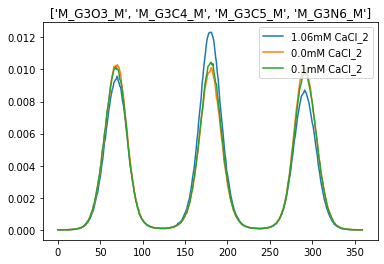

<Figure size 432x288 with 0 Axes>

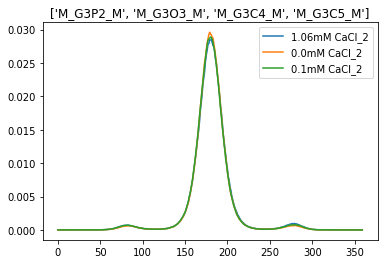

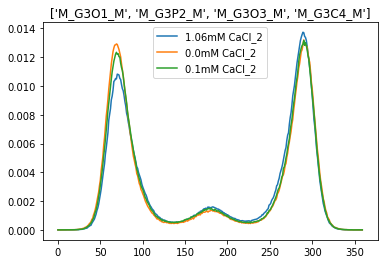

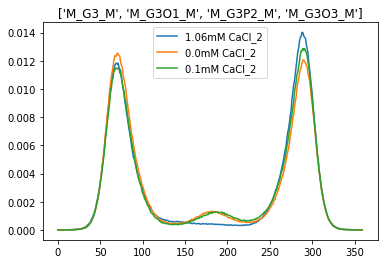

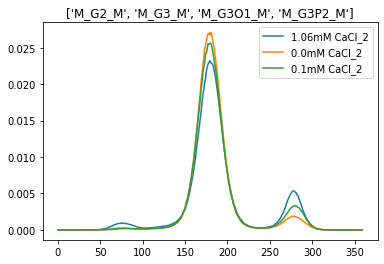

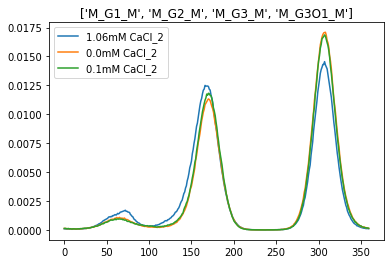

In [76]:
#dois = ['10.5281/zenodo.3997116', '10.5281/zenodo.4005515' , '10.5281/zenodo.3997135']  # CHARMM with CaCl
#dois = ['10.5281/zenodo.3613573'] #Slipids with CaCl 
#dois = ['10.5281/zenodo.3859339' , '10.5281/zenodo.3855729', '10.5281/zenodo.3862036']  # ECClipids with CaCl
dois = ['10.5281/zenodo.3857816', '10.5281/zenodo.3871590', '10.5281/zenodo.3864993']  # Lipid17 with CaCl
#dois = ['10.5281/zenodo.4040423','10.5281/zenodo.1288297'] # CHARMM with cationic surfactant
dihedrals = [['M_G3O3_M', 'M_G3C4_M', 'M_G3C5_M', 'M_G3N6_M'],
           ['M_G3O3_M','M_G3C4_M','M_G3C5_M','M_G3C6_M'],
           ['M_G3P2_M', 'M_G3O3_M', 'M_G3C4_M', 'M_G3C5_M'],
           ['M_G3O1_M', 'M_G3P2_M', 'M_G3O3_M', 'M_G3C4_M'],
           ['M_G3_M', 'M_G3O1_M', 'M_G3P2_M', 'M_G3O3_M'],
           ['M_G2_M', 'M_G3_M', 'M_G3O1_M', 'M_G3P2_M'],
           ['M_G1_M', 'M_G2_M', 'M_G3_M', 'M_G3O1_M']
           ]

#['M_G3O3_M', 'M_G3C4_M', 'M_G3C5_M', 'M_G3N6_M'],

#           ['M_G2_M', 'M_G3_M', 'M_G3O1_M', 'M_G3P3_M'],

#['M_G3O3_M','M_G3C4_M','M_G3C5_M','M_G3C6_M'],

for dih in dihedrals:
    try:
        plotDIHEDRALS(dois, 'POPC', 'POPG',dih)
    except:
        continue

In [22]:
plt.show()
#plt.savefig('../Data/tst.png')

In [11]:
# Lipid17 PC:PG mixtures at 310K
dois= ['10.5281/zenodo.3237657' , '10.5281/zenodo.3241243']
plotHGangles(dois, 'POPC', 'POPG')


dois= ['10.5281/zenodo.3241243', '10.5281/zenodo.3832219']
plotHGangles(dois, 'POPG', 'POPC')


../Data/HGorientation/299/9ba/2999ba7a8e75cdcbd0493b035d620556aa9a57c5/a92f8b57bb117b56d3bb16edc0d69662e0517d31
../Data/HGorientation/e24/62a/e2462abc0128804263156d1f68638eb22de0ada6/fd4e6f8ed63c831f7b8bef6c2e22a887e49f73f9
../Data/HGorientation/96f/656/96f65688e4d3d870516abbb3dba34436df44cd52/53cf119244fbdad6b04b8c9cd2d33090afeba06a
../Data/HGorientation/e24/62a/e2462abc0128804263156d1f68638eb22de0ada6/fd4e6f8ed63c831f7b8bef6c2e22a887e49f73f9


In [6]:
# slipids PC:PG mixtures at 310K
#dois= ['10.5281/zenodo.3237657' , '10.5281/zenodo.3241243']
#plotHGangles(dois, 'POPC', 'POPG')


dois= ['10.5281/zenodo.3364460', '10.5281/zenodo.3240156']
plotHGangles(dois, 'POPG', 'POPC')


../Data/HGorientation/aa4/e17/aa4e17293e2aecd83d08cb841a8c748446f9d597/0d7032928ab1b626803550c7a23196c612b4430f
../Data/HGorientation/b55/bc5/b55bc5c5d101c5e99cbddfad5566fcebe825ebd1/93065f4158f89ad6843df172660293c2162073db


In [5]:
# GROMOS-CKP PC:PG mixtures at 310K
dois= ['10.5281/zenodo.3247435' , '10.5281/zenodo.3266240']
plotHGangles(dois, 'POPC', 'POPG')


dois= ['10.5281/zenodo.3484548', '10.5281/zenodo.3266240']
plotHGangles(dois, 'POPG', 'POPC')

../Data/HGorientation/35d/d6b/35dd6bcb5bf03400b81c070292e36025c48dc1a6/3d0ca721c24d7f22d09178f10f1dd89a333dfe07
../Data/HGorientation/393/0bc/3930bc1addae9455c0c46e225fedbe7ed1db93ad/c1c23bdd2acb5f21f947cad163ba8274a0edf41d
../Data/HGorientation/393/0bc/3930bc1addae9455c0c46e225fedbe7ed1db93ad/c1c23bdd2acb5f21f947cad163ba8274a0edf41d
../Data/HGorientation/e73/1ae/e731aed54224afda560e6ed02db66a7a9108dc6f/345ac370b6c2c394f018a6421b5c4a09e41579fe


In [6]:
# Berger PC:PE mixtures at 310K
dois= ['10.5281/zenodo.1402417' , '10.5281/zenodo.1402449']
plotHGangles(dois, 'POPC', 'POPE')


../Data/HGorientation/deb/035/deb035658c6fe5b1199ffed00ec7cb43d986cb1d/38ef3210d00125cc0ca4daa27f169bf579dc3944
../Data/HGorientation/b26/a77/b26a77bb464996d420103059fbfc792f35f000d8/508b09dc91e254f859051b74040b1dc8e1342919


In [167]:
# CHARMM with CaCl
dois = ['10.5281/zenodo.3997116', '10.5281/zenodo.4005515' , '10.5281/zenodo.3997135']  
plotHGanglesIONS(dois, 'POPG', 'POPC', 'CAL')


../Data/HGorientation/0c2/1a9/0c21a9be136ea0eb9df9e5c6cdc19f723a0af245/9ac73b6a98acb54a7a67a5d690794ad7f1e4a1d1
../Data/HGorientation/207/4f9/2074f96d71ae32a42267bd5407a30ca9b26aca3e/e439d10af0c5ea60c8569780e32b416ea05f24b5
../Data/HGorientation/479/374/47937487ddd47f9f363eed8d048e153dec3b87bd/4404adfe3d70ba3582c6bfa0656563f8eaad7887


In [14]:
# Lipid17ecc with CaCl
dois= ['10.5281/zenodo.3859339' , '10.5281/zenodo.3855729', '10.5281/zenodo.3862036']

plotHGanglesIONS(dois, 'POPC', 'POPG', 'CAL')
plotHGanglesIONS(dois, 'POPG', 'POPC', 'CAL')



../Data/HGorientation/508/748/5087483af99bfbd427630e5974e20aea6d34b2ae/4062f0e472c77353fc638996ae7dfcb505f3433e
../Data/HGorientation/508/748/5087483af99bfbd427630e5974e20aea6d34b2ae/b0986c1ba7f7ade23f9c06f1aded51fd3a8c6304
../Data/HGorientation/5e2/0fe/5e20fe22000d94eb54ce0e030c1dd2439796b331/839c970611cedad2e65068b6e412d84c12831ed6
../Data/HGorientation/ca5/901/ca5901567ec1dc59289e7db37127ee3c88ef0df7/0c5652ab9358041f2b8ce555c01f5591e9feefea
../Data/HGorientation/508/748/5087483af99bfbd427630e5974e20aea6d34b2ae/4062f0e472c77353fc638996ae7dfcb505f3433e
../Data/HGorientation/508/748/5087483af99bfbd427630e5974e20aea6d34b2ae/b0986c1ba7f7ade23f9c06f1aded51fd3a8c6304
../Data/HGorientation/5e2/0fe/5e20fe22000d94eb54ce0e030c1dd2439796b331/839c970611cedad2e65068b6e412d84c12831ed6
../Data/HGorientation/ca5/901/ca5901567ec1dc59289e7db37127ee3c88ef0df7/0c5652ab9358041f2b8ce555c01f5591e9feefea


In [13]:
# Lipid17 POPC:POPG 1:1 with CaCl
dois= ['10.5281/zenodo.3859339' , '10.5281/zenodo.3855729', '10.5281/zenodo.3862036']

plotHGanglesIONS(dois, 'POPC', 'POPG', 'CAL')
plotHGanglesIONS(dois, 'POPG', 'POPC', 'CAL')



../Data/HGorientation/508/748/5087483af99bfbd427630e5974e20aea6d34b2ae/4062f0e472c77353fc638996ae7dfcb505f3433e
../Data/HGorientation/508/748/5087483af99bfbd427630e5974e20aea6d34b2ae/b0986c1ba7f7ade23f9c06f1aded51fd3a8c6304
../Data/HGorientation/5e2/0fe/5e20fe22000d94eb54ce0e030c1dd2439796b331/839c970611cedad2e65068b6e412d84c12831ed6
../Data/HGorientation/ca5/901/ca5901567ec1dc59289e7db37127ee3c88ef0df7/0c5652ab9358041f2b8ce555c01f5591e9feefea
../Data/HGorientation/508/748/5087483af99bfbd427630e5974e20aea6d34b2ae/4062f0e472c77353fc638996ae7dfcb505f3433e
../Data/HGorientation/508/748/5087483af99bfbd427630e5974e20aea6d34b2ae/b0986c1ba7f7ade23f9c06f1aded51fd3a8c6304
../Data/HGorientation/5e2/0fe/5e20fe22000d94eb54ce0e030c1dd2439796b331/839c970611cedad2e65068b6e412d84c12831ed6
../Data/HGorientation/ca5/901/ca5901567ec1dc59289e7db37127ee3c88ef0df7/0c5652ab9358041f2b8ce555c01f5591e9feefea


In [24]:
#Make dihedrals to range from 0 to 360

for subdir, dirs, files in os.walk(r'../Data/dihedral/'):
    for filename in files:
        filepath = subdir + os.sep + filename
        if filepath.endswith("M.xvg"):
            #print(filepath)
            outfilename = filepath.replace("M.xvg","M_0-360.xvg")
            print(outfilename)
            outfile1=open(outfilename,'w')
            outfile1.close()
            
            with open(filepath) as dih_data:
                outfile1=open(outfilename,'a')  
                for line in dih_data:
                    parts = line.split()
                    #print(line)
                    if float(parts[0]) > 0:
                        outfile1.write(str(parts[0]) + '  ' + str(parts[1]) + '\n')
                outfile1.close()
                
            with open(filepath) as dih_data:
                outfile1=open(outfilename,'a')
                for line in dih_data:
                    parts = line.split()
                    #print(line)
                    if float(parts[0]) < 0:
                        parts[0] = float(parts[0]) + 360
                        outfile1.write(str(parts[0]) + '  ' + str(parts[1]) + '\n')
                outfile1.close()
        #    READMEfilepath = subdir + '/README.yaml'
        #    with open(READMEfilepath) as yaml_file:
        #       readme = yaml.load(yaml_file, Loader=yaml.FullLoader)
            

../Data/dihedral/1b2/6e6/1b26e6c750b4f39c37770422cd4d3c40240cf111/995bc873b811ca09c916b47784fa33bb9d793732/POPS_M_G1C17_M_M_G1C16_M_M_G1C15_M_M_G1C14_M_0-360.xvg
../Data/dihedral/1b2/6e6/1b26e6c750b4f39c37770422cd4d3c40240cf111/995bc873b811ca09c916b47784fa33bb9d793732/POPS_M_G2C17_M_M_G2C16_M_M_G2C15_M_M_G2C14_M_0-360.xvg
../Data/dihedral/1b2/6e6/1b26e6c750b4f39c37770422cd4d3c40240cf111/995bc873b811ca09c916b47784fa33bb9d793732/POPS_M_G2C2O1_M_M_G2C2_M_M_G2O1_M_M_G2_M_0-360.xvg
../Data/dihedral/1b2/6e6/1b26e6c750b4f39c37770422cd4d3c40240cf111/995bc873b811ca09c916b47784fa33bb9d793732/POPS_M_G1C14_M_M_G1C13_M_M_G1C12_M_M_G1C11_M_0-360.xvg
../Data/dihedral/1b2/6e6/1b26e6c750b4f39c37770422cd4d3c40240cf111/995bc873b811ca09c916b47784fa33bb9d793732/POPS_M_G3O3_M_M_G3C4_M_M_G3C5_M_M_G3N6_M_0-360.xvg
../Data/dihedral/1b2/6e6/1b26e6c750b4f39c37770422cd4d3c40240cf111/995bc873b811ca09c916b47784fa33bb9d793732/POPS_M_G1C15_M_M_G1C14_M_M_G1C13_M_M_G1C12_M_0-360.xvg
../Data/dihedral/1b2/6e6/1b26e6c750b

../Data/dihedral/902/649/90264920ee5640b7c18082ff86a7fcc0b9bd75ea/b6e03a197721f25e989d3452166ec5f88ca0aae4/POPC_M_G2C14_M_M_G2C13_M_M_G2C12_M_M_G2C11_M_0-360.xvg
../Data/dihedral/902/649/90264920ee5640b7c18082ff86a7fcc0b9bd75ea/b6e03a197721f25e989d3452166ec5f88ca0aae4/POPG_M_G1C5_M_M_G1C4_M_M_G1C3_M_M_G1C2O1_M_0-360.xvg
../Data/dihedral/902/649/90264920ee5640b7c18082ff86a7fcc0b9bd75ea/b6e03a197721f25e989d3452166ec5f88ca0aae4/POPG_M_G2O1_M_M_G2_M_M_G3_M_M_G3O1_M_0-360.xvg
../Data/dihedral/902/649/90264920ee5640b7c18082ff86a7fcc0b9bd75ea/b6e03a197721f25e989d3452166ec5f88ca0aae4/POPC_M_G1C3_M_M_G1C2_M_M_G1O1_M_M_G1_M_0-360.xvg
../Data/dihedral/902/649/90264920ee5640b7c18082ff86a7fcc0b9bd75ea/b6e03a197721f25e989d3452166ec5f88ca0aae4/POPG_M_G1C5_M_M_G1C4_M_M_G1C3_M_M_G1C2_M_0-360.xvg
../Data/dihedral/902/649/90264920ee5640b7c18082ff86a7fcc0b9bd75ea/b6e03a197721f25e989d3452166ec5f88ca0aae4/POPC_M_G1C17_M_M_G1C16_M_M_G1C15_M_M_G1C14_M_0-360.xvg
../Data/dihedral/902/649/90264920ee5640b7c18082f

../Data/dihedral/372/817/3728174b1be9613822cc98a979dcdac176e057c4/9559e5c7df710415a2df60fc78de76d3a78d7699/POPC_M_G1C8_M_M_G1C7_M_M_G1C6_M_M_G1C5_M_0-360.xvg
../Data/dihedral/372/817/3728174b1be9613822cc98a979dcdac176e057c4/9559e5c7df710415a2df60fc78de76d3a78d7699/POPE_M_G1C12_M_M_G1C11_M_M_G1C10_M_M_G1C9_M_0-360.xvg
../Data/dihedral/372/817/3728174b1be9613822cc98a979dcdac176e057c4/9559e5c7df710415a2df60fc78de76d3a78d7699/POPC_M_G2C3_M_M_G2C2_M_M_G2O1_M_M_G2_M_0-360.xvg
../Data/dihedral/372/817/3728174b1be9613822cc98a979dcdac176e057c4/9559e5c7df710415a2df60fc78de76d3a78d7699/POPE_M_G1C3_M_M_G1C2_M_M_G1O1_M_M_G1_M_0-360.xvg
../Data/dihedral/372/817/3728174b1be9613822cc98a979dcdac176e057c4/9559e5c7df710415a2df60fc78de76d3a78d7699/POPC_M_G2C15_M_M_G2C14_M_M_G2C13_M_M_G2C12_M_0-360.xvg
../Data/dihedral/372/817/3728174b1be9613822cc98a979dcdac176e057c4/9559e5c7df710415a2df60fc78de76d3a78d7699/POPC_M_G3_M_M_G3O1_M_M_G3P2_M_M_G3O3_M_0-360.xvg
../Data/dihedral/372/817/3728174b1be9613822cc98a979

../Data/dihedral/5e2/0fe/5e20fe22000d94eb54ce0e030c1dd2439796b331/839c970611cedad2e65068b6e412d84c12831ed6/POPG_M_G1C9_M_M_G1C8_M_M_G1C7_M_M_G1C6_M_0-360.xvg
../Data/dihedral/5e2/0fe/5e20fe22000d94eb54ce0e030c1dd2439796b331/839c970611cedad2e65068b6e412d84c12831ed6/POPC_M_G2C12_M_M_G2C11_M_M_G2C10_M_M_G2C9_M_0-360.xvg
../Data/dihedral/5e2/0fe/5e20fe22000d94eb54ce0e030c1dd2439796b331/839c970611cedad2e65068b6e412d84c12831ed6/POPG_M_G2C6_M_M_G2C5_M_M_G2C4_M_M_G2C3_M_0-360.xvg
../Data/dihedral/5e2/0fe/5e20fe22000d94eb54ce0e030c1dd2439796b331/839c970611cedad2e65068b6e412d84c12831ed6/POPC_M_G1C10_M_M_G1C9_M_M_G1C8_M_M_G1C7_M_0-360.xvg
../Data/dihedral/5e2/0fe/5e20fe22000d94eb54ce0e030c1dd2439796b331/839c970611cedad2e65068b6e412d84c12831ed6/POPG_M_G2C12_M_M_G2C11_M_M_G2C10_M_M_G2C9_M_0-360.xvg
../Data/dihedral/5e2/0fe/5e20fe22000d94eb54ce0e030c1dd2439796b331/839c970611cedad2e65068b6e412d84c12831ed6/POPG_M_G3_M_M_G3O1_M_M_G3P2_M_M_G3O3_M_0-360.xvg
../Data/dihedral/5e2/0fe/5e20fe22000d94eb54ce0e

../Data/dihedral/479/374/47937487ddd47f9f363eed8d048e153dec3b87bd/4404adfe3d70ba3582c6bfa0656563f8eaad7887/POPC_M_G1C10_M_M_G1C9_M_M_G1C8_M_M_G1C7_M_0-360.xvg
../Data/dihedral/479/374/47937487ddd47f9f363eed8d048e153dec3b87bd/4404adfe3d70ba3582c6bfa0656563f8eaad7887/POPG_M_G2C12_M_M_G2C11_M_M_G2C10_M_M_G2C9_M_0-360.xvg
../Data/dihedral/479/374/47937487ddd47f9f363eed8d048e153dec3b87bd/4404adfe3d70ba3582c6bfa0656563f8eaad7887/POPG_M_G3_M_M_G3O1_M_M_G3P2_M_M_G3O3_M_0-360.xvg
../Data/dihedral/479/374/47937487ddd47f9f363eed8d048e153dec3b87bd/4404adfe3d70ba3582c6bfa0656563f8eaad7887/POPC_M_G1C8_M_M_G1C7_M_M_G1C6_M_M_G1C5_M_0-360.xvg
../Data/dihedral/479/374/47937487ddd47f9f363eed8d048e153dec3b87bd/4404adfe3d70ba3582c6bfa0656563f8eaad7887/POPC_M_G2C3_M_M_G2C2_M_M_G2O1_M_M_G2_M_0-360.xvg
../Data/dihedral/479/374/47937487ddd47f9f363eed8d048e153dec3b87bd/4404adfe3d70ba3582c6bfa0656563f8eaad7887/POPC_M_G2C15_M_M_G2C14_M_M_G2C13_M_M_G2C12_M_0-360.xvg
../Data/dihedral/479/374/47937487ddd47f9f363eed8

../Data/dihedral/1cc/c95/1ccc95a2fbe4eb6dc3442672820449a667b6c809/fa35f5627cf4ebe0a9d248fc0ff3b5d474181b8c/POPC_M_G1C2O1_M_M_G1C2_M_M_G1O1_M_M_G1_M_0-360.xvg
../Data/dihedral/1cc/c95/1ccc95a2fbe4eb6dc3442672820449a667b6c809/fa35f5627cf4ebe0a9d248fc0ff3b5d474181b8c/POPC_M_G2C10_M_M_G2C9_M_M_G2C8_M_M_G2C7_M_0-360.xvg
../Data/dihedral/1cc/c95/1ccc95a2fbe4eb6dc3442672820449a667b6c809/fa35f5627cf4ebe0a9d248fc0ff3b5d474181b8c/POPC_M_G1O1_M_M_G1_M_M_G2_M_M_G2O1_M_0-360.xvg
../Data/dihedral/1cc/c95/1ccc95a2fbe4eb6dc3442672820449a667b6c809/fa35f5627cf4ebe0a9d248fc0ff3b5d474181b8c/POPC_M_G2C11_M_M_G2C10_M_M_G2C9_M_M_G2C8_M_0-360.xvg
../Data/dihedral/1cc/c95/1ccc95a2fbe4eb6dc3442672820449a667b6c809/fa35f5627cf4ebe0a9d248fc0ff3b5d474181b8c/POPC_M_G1C9_M_M_G1C8_M_M_G1C7_M_M_G1C6_M_0-360.xvg
../Data/dihedral/1cc/c95/1ccc95a2fbe4eb6dc3442672820449a667b6c809/fa35f5627cf4ebe0a9d248fc0ff3b5d474181b8c/POPG_M_G1C16_M_M_G1C15_M_M_G1C14_M_M_G1C13_M_0-360.xvg
../Data/dihedral/1cc/c95/1ccc95a2fbe4eb6dc3442672

../Data/dihedral/4fb/255/4fb255b704c3d6a78c006a1b068e14c659d9667b/8e7e5deb23cdd19f7239116293ccf2a7995ecbbb/POPC_M_G3_M_M_G3O1_M_M_G3P2_M_M_G3P2O1_M_0-360.xvg
../Data/dihedral/4fb/255/4fb255b704c3d6a78c006a1b068e14c659d9667b/8e7e5deb23cdd19f7239116293ccf2a7995ecbbb/POPC_M_G1C11_M_M_G1C10_M_M_G1C9_M_M_G1C8_M_0-360.xvg
../Data/dihedral/4fb/255/4fb255b704c3d6a78c006a1b068e14c659d9667b/8e7e5deb23cdd19f7239116293ccf2a7995ecbbb/POPG_M_G1C6_M_M_G1C5_M_M_G1C4_M_M_G1C3_M_0-360.xvg
../Data/dihedral/4fb/255/4fb255b704c3d6a78c006a1b068e14c659d9667b/8e7e5deb23cdd19f7239116293ccf2a7995ecbbb/POPG_M_G2C13_M_M_G2C12_M_M_G2C11_M_M_G2C10_M_0-360.xvg
../Data/dihedral/4fb/255/4fb255b704c3d6a78c006a1b068e14c659d9667b/8e7e5deb23cdd19f7239116293ccf2a7995ecbbb/POPG_M_G2C9_M_M_G2C8_M_M_G2C7_M_M_G2C6_M_0-360.xvg
../Data/dihedral/4fb/255/4fb255b704c3d6a78c006a1b068e14c659d9667b/8e7e5deb23cdd19f7239116293ccf2a7995ecbbb/POPG_M_G1C12_M_M_G1C11_M_M_G1C10_M_M_G1C9_M_0-360.xvg
../Data/dihedral/4fb/255/4fb255b704c3d6a78c

../Data/dihedral/66f/81c/66f81c7905a792bfdc935f463c56af8bb1a1e31f/7050b07cc869d03e5645bc7935a4989dc0480766/POPC_M_G3_M_M_G3O1_M_M_G3P2_M_M_G3P2O2_M_0-360.xvg
../Data/dihedral/66f/81c/66f81c7905a792bfdc935f463c56af8bb1a1e31f/7050b07cc869d03e5645bc7935a4989dc0480766/POPC_M_G1C2O1_M_M_G1C2_M_M_G1O1_M_M_G1_M_0-360.xvg
../Data/dihedral/66f/81c/66f81c7905a792bfdc935f463c56af8bb1a1e31f/7050b07cc869d03e5645bc7935a4989dc0480766/POPC_M_G2C10_M_M_G2C9_M_M_G2C8_M_M_G2C7_M_0-360.xvg
../Data/dihedral/66f/81c/66f81c7905a792bfdc935f463c56af8bb1a1e31f/7050b07cc869d03e5645bc7935a4989dc0480766/POPC_M_G1O1_M_M_G1_M_M_G2_M_M_G2O1_M_0-360.xvg
../Data/dihedral/66f/81c/66f81c7905a792bfdc935f463c56af8bb1a1e31f/7050b07cc869d03e5645bc7935a4989dc0480766/POPC_M_G2C11_M_M_G2C10_M_M_G2C9_M_M_G2C8_M_0-360.xvg
../Data/dihedral/66f/81c/66f81c7905a792bfdc935f463c56af8bb1a1e31f/7050b07cc869d03e5645bc7935a4989dc0480766/POPC_M_G1C9_M_M_G1C8_M_M_G1C7_M_M_G1C6_M_0-360.xvg
../Data/dihedral/66f/81c/66f81c7905a792bfdc935f463c56

../Data/dihedral/e24/62a/e2462abc0128804263156d1f68638eb22de0ada6/fd4e6f8ed63c831f7b8bef6c2e22a887e49f73f9/POPG_M_G2C13_M_M_G2C12_M_M_G2C11_M_M_G2C10_M_0-360.xvg
../Data/dihedral/e24/62a/e2462abc0128804263156d1f68638eb22de0ada6/fd4e6f8ed63c831f7b8bef6c2e22a887e49f73f9/POPG_M_G2C9_M_M_G2C8_M_M_G2C7_M_M_G2C6_M_0-360.xvg
../Data/dihedral/e24/62a/e2462abc0128804263156d1f68638eb22de0ada6/fd4e6f8ed63c831f7b8bef6c2e22a887e49f73f9/POPG_M_G1C12_M_M_G1C11_M_M_G1C10_M_M_G1C9_M_0-360.xvg
../Data/dihedral/e24/62a/e2462abc0128804263156d1f68638eb22de0ada6/fd4e6f8ed63c831f7b8bef6c2e22a887e49f73f9/POPG_M_G2C16_M_M_G2C15_M_M_G2C14_M_M_G2C13_M_0-360.xvg
../Data/dihedral/e24/62a/e2462abc0128804263156d1f68638eb22de0ada6/fd4e6f8ed63c831f7b8bef6c2e22a887e49f73f9/POPG_M_G1C15_M_M_G1C14_M_M_G1C13_M_M_G1C12_M_0-360.xvg
../Data/dihedral/e24/62a/e2462abc0128804263156d1f68638eb22de0ada6/fd4e6f8ed63c831f7b8bef6c2e22a887e49f73f9/POPC_M_G1C14_M_M_G1C13_M_M_G1C12_M_M_G1C11_M_0-360.xvg
../Data/dihedral/e24/62a/e2462abc

../Data/dihedral/c74/6ca/c746ca52b71d685e53a802e8046e1253baf6af2b/8850a90345eb033df4ae3228c3b9fa1fbbe40162/POPG_M_G3P2_M_M_G3O3_M_M_G3C4_M_M_G3C5_M_0-360.xvg
../Data/dihedral/c74/6ca/c746ca52b71d685e53a802e8046e1253baf6af2b/8850a90345eb033df4ae3228c3b9fa1fbbe40162/POPC_M_G3P2_M_M_G3O3_M_M_G3C4_M_M_G3C5_M_0-360.xvg
../Data/dihedral/c74/6ca/c746ca52b71d685e53a802e8046e1253baf6af2b/8850a90345eb033df4ae3228c3b9fa1fbbe40162/POPG_M_G2C5_M_M_G2C4_M_M_G2C3_M_M_G2C2_M_0-360.xvg
../Data/dihedral/c74/6ca/c746ca52b71d685e53a802e8046e1253baf6af2b/8850a90345eb033df4ae3228c3b9fa1fbbe40162/POPG_M_G1C11_M_M_G1C10_M_M_G1C9_M_M_G1C8_M_0-360.xvg
../Data/dihedral/c74/6ca/c746ca52b71d685e53a802e8046e1253baf6af2b/8850a90345eb033df4ae3228c3b9fa1fbbe40162/POPG_M_G1C8_M_M_G1C7_M_M_G1C6_M_M_G1C5_M_0-360.xvg
../Data/dihedral/c74/6ca/c746ca52b71d685e53a802e8046e1253baf6af2b/8850a90345eb033df4ae3228c3b9fa1fbbe40162/POPG_M_G3O3_M_M_G3C4_M_M_G3C5_M_M_G3C6_M_0-360.xvg
../Data/dihedral/c74/6ca/c746ca52b71d685e53a802e80

../Data/dihedral/fa3/458/fa34583fd2a80ef3717ab05ae626fb4abdcbad44/2be9688985eb0b9fa11cec7b6ba8a674181aa21a/POPG_M_G2C2O1_M_M_G2C2_M_M_G2O1_M_M_G2_M_0-360.xvg
../Data/dihedral/fa3/458/fa34583fd2a80ef3717ab05ae626fb4abdcbad44/2be9688985eb0b9fa11cec7b6ba8a674181aa21a/POPG_M_G2C18_M_M_G2C17_M_M_G2C16_M_M_G2C15_M_0-360.xvg
../Data/dihedral/fa3/458/fa34583fd2a80ef3717ab05ae626fb4abdcbad44/2be9688985eb0b9fa11cec7b6ba8a674181aa21a/POPC_M_G3_M_M_G3O1_M_M_G3P2_M_M_G3P2O2_M_0-360.xvg
../Data/dihedral/fa3/458/fa34583fd2a80ef3717ab05ae626fb4abdcbad44/2be9688985eb0b9fa11cec7b6ba8a674181aa21a/POPC_M_G1C2O1_M_M_G1C2_M_M_G1O1_M_M_G1_M_0-360.xvg
../Data/dihedral/fa3/458/fa34583fd2a80ef3717ab05ae626fb4abdcbad44/2be9688985eb0b9fa11cec7b6ba8a674181aa21a/POPC_M_G2C10_M_M_G2C9_M_M_G2C8_M_M_G2C7_M_0-360.xvg
../Data/dihedral/fa3/458/fa34583fd2a80ef3717ab05ae626fb4abdcbad44/2be9688985eb0b9fa11cec7b6ba8a674181aa21a/POPC_M_G1O1_M_M_G1_M_M_G2_M_M_G2O1_M_0-360.xvg
../Data/dihedral/fa3/458/fa34583fd2a80ef3717ab05ae6

../Data/dihedral/ed4/076/ed4076a232ce5d87dc4a244164604a0b91d9d877/25731b859c4bc2652de35ead4f799ac1d922df28/POPC_M_G1O1_M_M_G1_M_M_G2_M_M_G3_M_0-360.xvg
../Data/dihedral/ed4/076/ed4076a232ce5d87dc4a244164604a0b91d9d877/25731b859c4bc2652de35ead4f799ac1d922df28/POPC_M_G1C13_M_M_G1C12_M_M_G1C11_M_M_G1C10_M_0-360.xvg
../Data/dihedral/ed4/076/ed4076a232ce5d87dc4a244164604a0b91d9d877/25731b859c4bc2652de35ead4f799ac1d922df28/POPC_M_G2C16_M_M_G2C15_M_M_G2C14_M_M_G2C13_M_0-360.xvg
../Data/dihedral/ed4/076/ed4076a232ce5d87dc4a244164604a0b91d9d877/25731b859c4bc2652de35ead4f799ac1d922df28/POPC_M_G3O1_M_M_G3P2_M_M_G3O3_M_M_G3C4_M_0-360.xvg
../Data/dihedral/ed4/076/ed4076a232ce5d87dc4a244164604a0b91d9d877/25731b859c4bc2652de35ead4f799ac1d922df28/POPC_M_G2C7_M_M_G2C6_M_M_G2C5_M_M_G2C4_M_0-360.xvg
../Data/dihedral/ed4/076/ed4076a232ce5d87dc4a244164604a0b91d9d877/25731b859c4bc2652de35ead4f799ac1d922df28/POPC_M_G3_M_M_G3O1_M_M_G3P2_M_M_G3P2O1_M_0-360.xvg
../Data/dihedral/ed4/076/ed4076a232ce5d87dc4a24416

../Data/dihedral/efe/f45/efef45ac201347d6822e5436d2566d3be298b54a/a2c7ff5a30728119cc82206b15a3df9fb63eaf5e/POPG_M_G1C8_M_M_G1C7_M_M_G1C6_M_M_G1C5_M_0-360.xvg
../Data/dihedral/efe/f45/efef45ac201347d6822e5436d2566d3be298b54a/a2c7ff5a30728119cc82206b15a3df9fb63eaf5e/POPG_M_G3O3_M_M_G3C4_M_M_G3C5_M_M_G3C6_M_0-360.xvg
../Data/dihedral/efe/f45/efef45ac201347d6822e5436d2566d3be298b54a/a2c7ff5a30728119cc82206b15a3df9fb63eaf5e/POPG_M_G2C7_M_M_G2C6_M_M_G2C5_M_M_G2C4_M_0-360.xvg
../Data/dihedral/efe/f45/efef45ac201347d6822e5436d2566d3be298b54a/a2c7ff5a30728119cc82206b15a3df9fb63eaf5e/POPC_M_G1C12_M_M_G1C11_M_M_G1C10_M_M_G1C9_M_0-360.xvg
../Data/dihedral/efe/f45/efef45ac201347d6822e5436d2566d3be298b54a/a2c7ff5a30728119cc82206b15a3df9fb63eaf5e/POPC_M_G2_M_M_G3_M_M_G3O1_M_M_G3P2_M_0-360.xvg
../Data/dihedral/efe/f45/efef45ac201347d6822e5436d2566d3be298b54a/a2c7ff5a30728119cc82206b15a3df9fb63eaf5e/POPG_M_G1O1_M_M_G1_M_M_G2_M_M_G3_M_0-360.xvg
../Data/dihedral/efe/f45/efef45ac201347d6822e5436d2566d3be2

../Data/dihedral/2b9/b0d/2b9b0d32b79cea2fe66a283bf52e9c1f648393e4/b9251450aa7886b4109908c1ada3d666a77ba77b/POPG_M_G2C9_M_M_G2C8_M_M_G2C7_M_M_G2C6_M_0-360.xvg
../Data/dihedral/2b9/b0d/2b9b0d32b79cea2fe66a283bf52e9c1f648393e4/b9251450aa7886b4109908c1ada3d666a77ba77b/POPG_M_G1C12_M_M_G1C11_M_M_G1C10_M_M_G1C9_M_0-360.xvg
../Data/dihedral/2b9/b0d/2b9b0d32b79cea2fe66a283bf52e9c1f648393e4/b9251450aa7886b4109908c1ada3d666a77ba77b/POPG_M_G2C16_M_M_G2C15_M_M_G2C14_M_M_G2C13_M_0-360.xvg
../Data/dihedral/2b9/b0d/2b9b0d32b79cea2fe66a283bf52e9c1f648393e4/b9251450aa7886b4109908c1ada3d666a77ba77b/POPG_M_G1C15_M_M_G1C14_M_M_G1C13_M_M_G1C12_M_0-360.xvg
../Data/dihedral/2b9/b0d/2b9b0d32b79cea2fe66a283bf52e9c1f648393e4/b9251450aa7886b4109908c1ada3d666a77ba77b/POPC_M_G1C14_M_M_G1C13_M_M_G1C12_M_M_G1C11_M_0-360.xvg
../Data/dihedral/2b9/b0d/2b9b0d32b79cea2fe66a283bf52e9c1f648393e4/b9251450aa7886b4109908c1ada3d666a77ba77b/POPG_M_G2C3_M_M_G2C2_M_M_G2O1_M_M_G2_M_0-360.xvg
../Data/dihedral/2b9/b0d/2b9b0d32b79cea

../Data/dihedral/ca5/901/ca5901567ec1dc59289e7db37127ee3c88ef0df7/0c5652ab9358041f2b8ce555c01f5591e9feefea/POPG_M_G1C6_M_M_G1C5_M_M_G1C4_M_M_G1C3_M_0-360.xvg
../Data/dihedral/ca5/901/ca5901567ec1dc59289e7db37127ee3c88ef0df7/0c5652ab9358041f2b8ce555c01f5591e9feefea/POPG_M_G2C13_M_M_G2C12_M_M_G2C11_M_M_G2C10_M_0-360.xvg
../Data/dihedral/ca5/901/ca5901567ec1dc59289e7db37127ee3c88ef0df7/0c5652ab9358041f2b8ce555c01f5591e9feefea/POPG_M_G2C9_M_M_G2C8_M_M_G2C7_M_M_G2C6_M_0-360.xvg
../Data/dihedral/ca5/901/ca5901567ec1dc59289e7db37127ee3c88ef0df7/0c5652ab9358041f2b8ce555c01f5591e9feefea/POPG_M_G1C12_M_M_G1C11_M_M_G1C10_M_M_G1C9_M_0-360.xvg
../Data/dihedral/ca5/901/ca5901567ec1dc59289e7db37127ee3c88ef0df7/0c5652ab9358041f2b8ce555c01f5591e9feefea/POPG_M_G2C16_M_M_G2C15_M_M_G2C14_M_M_G2C13_M_0-360.xvg
../Data/dihedral/ca5/901/ca5901567ec1dc59289e7db37127ee3c88ef0df7/0c5652ab9358041f2b8ce555c01f5591e9feefea/POPG_M_G1C15_M_M_G1C14_M_M_G1C13_M_M_G1C12_M_0-360.xvg
../Data/dihedral/ca5/901/ca5901567ec1

../Data/dihedral/207/4f9/2074f96d71ae32a42267bd5407a30ca9b26aca3e/e439d10af0c5ea60c8569780e32b416ea05f24b5/POPC_M_G2C2O1_M_M_G2C2_M_M_G2O1_M_M_G2_M_0-360.xvg
../Data/dihedral/207/4f9/2074f96d71ae32a42267bd5407a30ca9b26aca3e/e439d10af0c5ea60c8569780e32b416ea05f24b5/POPG_M_G1C4_M_M_G1C3_M_M_G1C2_M_M_G1O1_M_0-360.xvg
../Data/dihedral/207/4f9/2074f96d71ae32a42267bd5407a30ca9b26aca3e/e439d10af0c5ea60c8569780e32b416ea05f24b5/POPC_M_G2C4_M_M_G2C3_M_M_G2C2_M_M_G2O1_M_0-360.xvg
../Data/dihedral/207/4f9/2074f96d71ae32a42267bd5407a30ca9b26aca3e/e439d10af0c5ea60c8569780e32b416ea05f24b5/POPC_M_G1C15_M_M_G1C14_M_M_G1C13_M_M_G1C12_M_0-360.xvg
../Data/dihedral/207/4f9/2074f96d71ae32a42267bd5407a30ca9b26aca3e/e439d10af0c5ea60c8569780e32b416ea05f24b5/POPG_M_G1C7_M_M_G1C6_M_M_G1C5_M_M_G1C4_M_0-360.xvg
../Data/dihedral/207/4f9/2074f96d71ae32a42267bd5407a30ca9b26aca3e/e439d10af0c5ea60c8569780e32b416ea05f24b5/POPC_M_G2O1_M_M_G2_M_M_G3_M_M_G3O1_M_0-360.xvg
../Data/dihedral/207/4f9/2074f96d71ae32a42267bd5407a

../Data/dihedral/a63/ca7/a63ca7001cbd5cfc328da122668d1aebc00f2c91/220540156a6ac7813942fd01d998a491b6ff9b8b/POPC_M_G2C12_M_M_G2C11_M_M_G2C10_M_M_G2C9_M_0-360.xvg
../Data/dihedral/a63/ca7/a63ca7001cbd5cfc328da122668d1aebc00f2c91/220540156a6ac7813942fd01d998a491b6ff9b8b/POPC_M_G1C10_M_M_G1C9_M_M_G1C8_M_M_G1C7_M_0-360.xvg
../Data/dihedral/a63/ca7/a63ca7001cbd5cfc328da122668d1aebc00f2c91/220540156a6ac7813942fd01d998a491b6ff9b8b/POPC_M_G1C8_M_M_G1C7_M_M_G1C6_M_M_G1C5_M_0-360.xvg
../Data/dihedral/a63/ca7/a63ca7001cbd5cfc328da122668d1aebc00f2c91/220540156a6ac7813942fd01d998a491b6ff9b8b/POPC_M_G2C3_M_M_G2C2_M_M_G2O1_M_M_G2_M_0-360.xvg
../Data/dihedral/a63/ca7/a63ca7001cbd5cfc328da122668d1aebc00f2c91/220540156a6ac7813942fd01d998a491b6ff9b8b/POPC_M_G2C15_M_M_G2C14_M_M_G2C13_M_M_G2C12_M_0-360.xvg
../Data/dihedral/a63/ca7/a63ca7001cbd5cfc328da122668d1aebc00f2c91/220540156a6ac7813942fd01d998a491b6ff9b8b/POPC_M_G3_M_M_G3O1_M_M_G3P2_M_M_G3O3_M_0-360.xvg
../Data/dihedral/a63/ca7/a63ca7001cbd5cfc328da12

../Data/dihedral/0c2/1a9/0c21a9be136ea0eb9df9e5c6cdc19f723a0af245/9ac73b6a98acb54a7a67a5d690794ad7f1e4a1d1/POPC_M_G2C12_M_M_G2C11_M_M_G2C10_M_M_G2C9_M_0-360.xvg
../Data/dihedral/0c2/1a9/0c21a9be136ea0eb9df9e5c6cdc19f723a0af245/9ac73b6a98acb54a7a67a5d690794ad7f1e4a1d1/POPG_M_G2C6_M_M_G2C5_M_M_G2C4_M_M_G2C3_M_0-360.xvg
../Data/dihedral/0c2/1a9/0c21a9be136ea0eb9df9e5c6cdc19f723a0af245/9ac73b6a98acb54a7a67a5d690794ad7f1e4a1d1/POPC_M_G1C10_M_M_G1C9_M_M_G1C8_M_M_G1C7_M_0-360.xvg
../Data/dihedral/0c2/1a9/0c21a9be136ea0eb9df9e5c6cdc19f723a0af245/9ac73b6a98acb54a7a67a5d690794ad7f1e4a1d1/POPG_M_G2C12_M_M_G2C11_M_M_G2C10_M_M_G2C9_M_0-360.xvg
../Data/dihedral/0c2/1a9/0c21a9be136ea0eb9df9e5c6cdc19f723a0af245/9ac73b6a98acb54a7a67a5d690794ad7f1e4a1d1/POPG_M_G3_M_M_G3O1_M_M_G3P2_M_M_G3O3_M_0-360.xvg
../Data/dihedral/0c2/1a9/0c21a9be136ea0eb9df9e5c6cdc19f723a0af245/9ac73b6a98acb54a7a67a5d690794ad7f1e4a1d1/POPC_M_G1C8_M_M_G1C7_M_M_G1C6_M_M_G1C5_M_0-360.xvg
../Data/dihedral/0c2/1a9/0c21a9be136ea0eb9df9e5

../Data/dihedral/73e/223/73e223464a5da222a5b3cf461a06295d52387d41/31d6c113df7563e0164abd1e7c696d9df8740aa4/POPC_M_G1C5_M_M_G1C4_M_M_G1C3_M_M_G1C2O1_M_0-360.xvg
../Data/dihedral/73e/223/73e223464a5da222a5b3cf461a06295d52387d41/31d6c113df7563e0164abd1e7c696d9df8740aa4/POPE_M_G1_M_M_G2_M_M_G3_M_M_G3O1_M_0-360.xvg
../Data/dihedral/73e/223/73e223464a5da222a5b3cf461a06295d52387d41/31d6c113df7563e0164abd1e7c696d9df8740aa4/POPC_M_G1C16_M_M_G1C15_M_M_G1C14_M_M_G1C13_M_0-360.xvg
../Data/dihedral/73e/223/73e223464a5da222a5b3cf461a06295d52387d41/31d6c113df7563e0164abd1e7c696d9df8740aa4/POPE_M_G1O1_M_M_G1_M_M_G2_M_M_G3_M_0-360.xvg
../Data/dihedral/73e/223/73e223464a5da222a5b3cf461a06295d52387d41/31d6c113df7563e0164abd1e7c696d9df8740aa4/POPE_M_G1C13_M_M_G1C12_M_M_G1C11_M_M_G1C10_M_0-360.xvg
../Data/dihedral/73e/223/73e223464a5da222a5b3cf461a06295d52387d41/31d6c113df7563e0164abd1e7c696d9df8740aa4/POPC_M_G2C2_M_M_G2O1_M_M_G2_M_M_G1_M_0-360.xvg
../Data/dihedral/73e/223/73e223464a5da222a5b3cf461a06295d5

../Data/dihedral/5a4/277/5a427728e5bcc18a6f162a8d325df4a9e4115250/f0fe9b9284aa683f9a419d9173d320cfa31d34cb/POPC_M_G2C9_M_M_G2C8_M_M_G2C7_M_M_G2C6_M_0-360.xvg
../Data/dihedral/5a4/277/5a427728e5bcc18a6f162a8d325df4a9e4115250/f0fe9b9284aa683f9a419d9173d320cfa31d34cb/POPC_M_G1C4_M_M_G1C3_M_M_G1C2_M_M_G1O1_M_0-360.xvg
../Data/dihedral/5a4/277/5a427728e5bcc18a6f162a8d325df4a9e4115250/f0fe9b9284aa683f9a419d9173d320cfa31d34cb/POPC_M_G1C7_M_M_G1C6_M_M_G1C5_M_M_G1C4_M_0-360.xvg
../Data/dihedral/5a4/277/5a427728e5bcc18a6f162a8d325df4a9e4115250/f0fe9b9284aa683f9a419d9173d320cfa31d34cb/POPC_M_G2C19_M_M_G2C18_M_M_G2C17_M_M_G2C16_M_0-360.xvg
../Data/dihedral/5a4/277/5a427728e5bcc18a6f162a8d325df4a9e4115250/f0fe9b9284aa683f9a419d9173d320cfa31d34cb/POPC_M_G2C5_M_M_G2C4_M_M_G2C3_M_M_G2C2_M_0-360.xvg
../Data/dihedral/5a4/277/5a427728e5bcc18a6f162a8d325df4a9e4115250/f0fe9b9284aa683f9a419d9173d320cfa31d34cb/POPC_M_G2C13_M_M_G2C12_M_M_G2C11_M_M_G2C10_M_0-360.xvg
../Data/dihedral/5a4/277/5a427728e5bcc18a6f1